In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers, regularizers

import matplotlib.pyplot as plt

Found 6000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


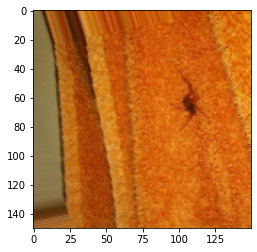

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/train',target_size=(150,150), 
                                batch_size=32,class_mode='categorical')

val_generator = test_datagen.flow_from_directory('dataset/val',target_size=(150,150), 
                                batch_size=32,class_mode='categorical')
plt.imshow(train_generator[0][0][6])

In [4]:
model = tf.keras.models.Sequential()
# Primer convolucion
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

# Segunda convolucion
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# Tercera convolucion
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
# Cuarta convolucion
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
checkpoint = ModelCheckpoint('spider_classification.hdf5', 
                            monitor='val_accuracy', verbose=1, save_best_only=True)

In [6]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(),metrics=['accuracy'])

In [15]:
history = model.fit(train_generator, steps_per_epoch=6000//32, epochs=100,
                    validation_data=val_generator, validation_steps=3000//32,
                    callbacks=[checkpoint])

Epoch 1/100
187/187 [==============================] - ETA: 0s - loss: 0.8697 - accuracy: 0.5838
Epoch 1: val_accuracy improved from 0.49867 to 0.59509, saving model to spider_classification.hdf5
187/187 [==============================] - 43s 228ms/step - loss: 0.8697 - accuracy: 0.5838 - val_loss: 0.8410 - val_accuracy: 0.5951
Epoch 2/100
187/187 [==============================] - ETA: 0s - loss: 0.8336 - accuracy: 0.6066
Epoch 2: val_accuracy improved from 0.59509 to 0.67036, saving model to spider_classification.hdf5
187/187 [==============================] - 50s 265ms/step - loss: 0.8336 - accuracy: 0.6066 - val_loss: 0.7719 - val_accuracy: 0.6704
Epoch 3/100
187/187 [==============================] - ETA: 0s - loss: 0.7885 - accuracy: 0.6416
Epoch 3: val_accuracy improved from 0.67036 to 0.67473, saving model to spider_classification.hdf5
187/187 [==============================] - 46s 244ms/step - loss: 0.7885 - accuracy: 0.6416 - val_loss: 0.7267 - val_accuracy: 0.6747
Epoch 4/10

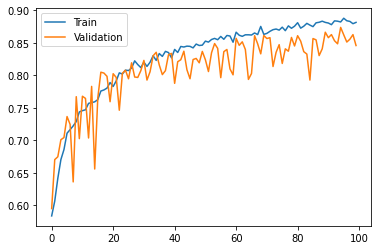

In [16]:
history_dict = history.history
plt.plot(history_dict['accuracy'],label='Train')
plt.plot(history_dict['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [7]:
model_2 = model
model_2.load_weights('./spider_classification.hdf5')

In [8]:
test_generator = test_datagen.flow_from_directory('dataset/test',target_size=(150,150), 
                                batch_size=32,class_mode='categorical')

Found 3000 images belonging to 3 classes.


In [9]:
model_2.evaluate(test_generator)

94/94 [==============================] - 15s 125ms/step - loss: 0.4925 - accuracy: 0.8283


[0.4924870729446411, 0.82833331823349]

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [11]:
#img = load_img('./Tarantula_5433.jpg',target_size=(150,150))
#img = load_img('./tarantula_goliath.jpg',target_size=(150,150))
img = load_img('./tarantula_cobalt.jpg',target_size=(150,150))
#img = load_img('./violin.jpg',target_size=(150,150))
#img = load_img('./violinista_2.jpg',target_size=(150,150))
#img = load_img('./viuda_2.jpeg',target_size=(150,150))
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255.0
result = model_2.predict(img)
result.shape
print(f'Probabilidad de ser viuda {round(result[0][0],3)}')
print(f'Probabilidad de ser violinista {round(result[0][1],3)}')
print(f'Probabilidad de ser tarántula {round(result[0][2],3)}')

Probabilidad de ser viuda 0.0020000000949949026
Probabilidad de ser violinista 0.013000000268220901
Probabilidad de ser tarántula 0.984000027179718


In [14]:
model_2.save('./model.h5')